# DATA SCIENCE INTERN @BHARAT INTERN


### DONE BY: SNEHANKITA PATNAIK

## TASK 1 : STOCK PREDICTION

## PURPOSE : TO PREDICT THE STOCK PRICE OF A COMPANY USING LSTM.

### ABOUT DATASET


### Netflix Stock Prediction

### CSV file of Netflix, Inc. (NFLX) stock prices from Jan 04, 2010 to May 23, 2022 retrieved from

#### https://www.kaggle.com/datasets/rafaeltiedra/nflx-csv-file

##  IMPORTING LIBRARIES

In [1]:
#importing libraries to be used
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

# Read csv file (NETFLIX stock price )

In [2]:
# data_importing
df = pd.read_csv("NFLX.csv")
# fetching first 10 rows of dataset
df.head(10) 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.931429,7.961429,7.565714,7.640000,7.640000,17239600
1,2010-01-05,7.652857,7.657143,7.258571,7.358571,7.358571,23753100
2,2010-01-06,7.361429,7.672857,7.197143,7.617143,7.617143,23290400
3,2010-01-07,7.731429,7.757143,7.462857,7.485714,7.485714,9955400
4,2010-01-08,7.498571,7.742857,7.465714,7.614286,7.614286,8180900
5,2010-01-11,7.660000,7.704286,7.528571,7.604286,7.604286,6783700
6,2010-01-12,7.528571,7.582857,7.451429,7.481429,7.481429,6330100
7,2010-01-13,7.612857,7.754286,7.558571,7.708571,7.708571,14422100
8,2010-01-14,7.518571,7.575714,7.270000,7.284286,7.284286,17685500
9,2010-01-15,7.245714,7.407143,7.232857,7.278571,7.278571,13031200


# Data Exploration & Cleaning

In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3114,2022-05-17,189.169998,191.399994,185.169998,190.559998,190.559998,9876700
3115,2022-05-18,186.720001,187.699997,176.270004,177.190002,177.190002,9665600
3116,2022-05-19,178.050003,186.300003,175.710007,183.479996,183.479996,10448500
3117,2022-05-20,185.869995,190.190002,179.770004,186.350006,186.350006,10422600
3118,2022-05-23,186.149994,187.660004,177.889999,187.440002,187.440002,9558000


In [5]:
df.shape

(3119, 7)

In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,3.119000e+03
mean,185.774606,188.574990,182.773507,185.747629,185.747629,1.879939e+07
std,182.675775,185.222112,179.874082,182.575796,182.575796,2.091301e+07
min,6.960000,7.178571,6.931429,7.018571,7.018571,1.144000e+06
25%,33.255714,33.815000,32.611429,33.328571,33.328571,6.233250e+06
50%,100.209999,102.110001,98.529999,100.230003,100.230003,1.232560e+07
75%,336.800003,342.384995,331.125000,337.539993,337.539993,2.342225e+07
max,692.349976,700.989990,686.090027,691.690002,691.690002,3.155418e+08


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3119 entries, 0 to 3118
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3119 non-null   object 
 1   Open       3119 non-null   float64
 2   High       3119 non-null   float64
 3   Low        3119 non-null   float64
 4   Close      3119 non-null   float64
 5   Adj Close  3119 non-null   float64
 6   Volume     3119 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 170.7+ KB


In [8]:
# check for non-null values
df.count()

Date         3119
Open         3119
High         3119
Low          3119
Close        3119
Adj Close    3119
Volume       3119
dtype: int64

In [9]:
#checking for the null values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
#Check for required columns
df = df[['Date','Open','Close']] 

# converting object dtype of date column to datetime dtype

df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: x.split()[0])) 

In [11]:
df.set_index('Date',drop=True,inplace=True) 
df.head(10)

,Open,Close
Date,,
2010-01-04,7.931429,7.640000
2010-01-05,7.652857,7.358571
2010-01-06,7.361429,7.617143
2010-01-07,7.731429,7.485714
2010-01-08,7.498571,7.614286
2010-01-11,7.660000,7.604286
2010-01-12,7.528571,7.481429
2010-01-13,7.612857,7.708571
2010-01-14,7.518571,7.284286


# Data Visulaization

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'Close'}>]], dtype=object)

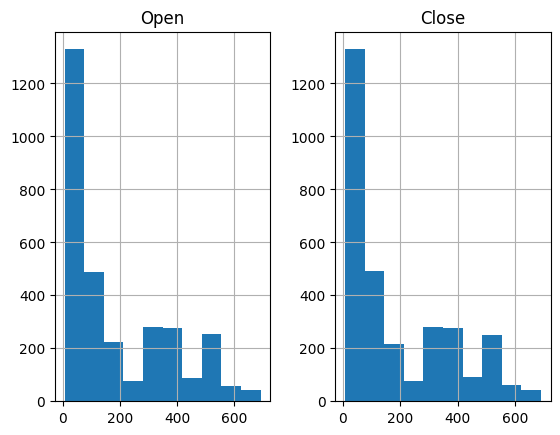

In [12]:
df.hist()

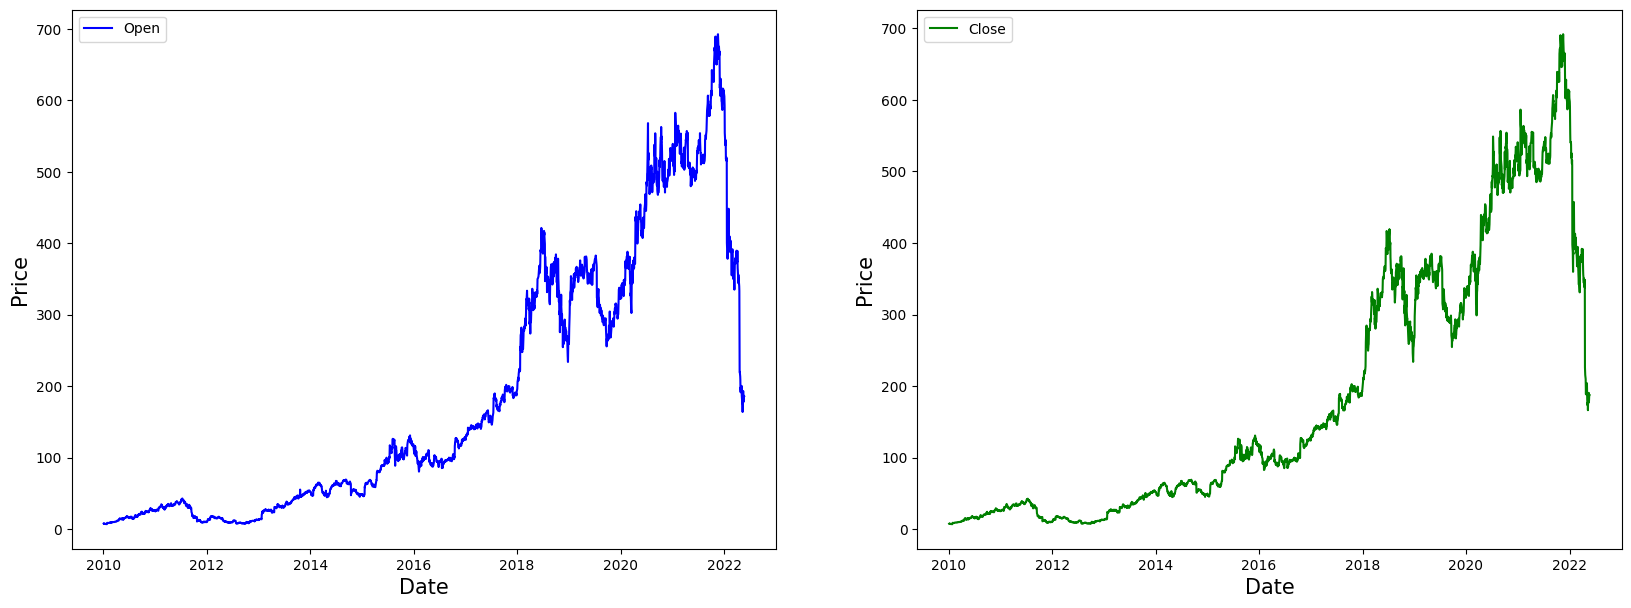

In [13]:
# plotting open and closing price on date index
fig, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df['Open'],label='Open',color='blue')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(df['Close'],label='Close',color='green')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fig.show()

# Pre- processing the data

In [14]:
# normalizing all the values of all columns using MinMaxScaler
MMS = MinMaxScaler()
df[df.columns] = MMS.fit_transform(df)
df.head(10)

,Open,Close
Date,,
2010-01-04,0.001417,0.000908
2010-01-05,0.001011,0.000497
2010-01-06,0.000586,0.000874
2010-01-07,0.001126,0.000682
2010-01-08,0.000786,0.000870
2010-01-11,0.001021,0.000855
2010-01-12,0.000830,0.000676
2010-01-13,0.000953,0.001008
2010-01-14,0.000815,0.000388


In [15]:
df.tail(10)

,Open,Close
Date,,
2022-05-10,0.246648,0.249231
2022-05-11,0.246765,0.232741
2022-05-12,0.229067,0.244338
2022-05-13,0.248326,0.263807
2022-05-16,0.271874,0.262157
2022-05-17,0.265849,0.268072
2022-05-18,0.262274,0.248545
2022-05-19,0.249624,0.257732
2022-05-20,0.261034,0.261923


In [16]:
# splitting the data into train and test set
# Select 75 % for train and 25 % for test
training_size = round(len(df) * 0.75) 

In [17]:
training_size

2339

In [18]:
train_data = df[:training_size]
test_data  = df[training_size:]

train_data.shape, test_data.shape

((2339, 2), (780, 2))

In [19]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [20]:
train_seq, train_label = create_sequence(train_data) 
test_seq, test_label = create_sequence(test_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((2289, 50, 2), (2289, 2), (730, 50, 2), (730, 2))

# CREATING LSTM MODEL

In [21]:
# imported Sequential from keras.models 
model = Sequential()
# importing Dense, Dropout, LSTM, Bidirectional from keras.layers 
model.add(LSTM(units=25, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=25))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 25)            2800      
                                                                 
 dropout (Dropout)           (None, 50, 25)            0         
                                                                 
 lstm_1 (LSTM)               (None, 25)                5100      
                                                                 
 dense (Dense)               (None, 2)                 52        
                                                                 
Total params: 7,952
Trainable params: 7,952
Non-trainable params: 0
_________________________________________________________________


In [22]:
# fitting the model by iterating the dataset over 100 times(100 epochs)
model.fit(train_seq, train_label, epochs=100,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/100
72/72 [==============================] - 16s 89ms/step - loss: 0.0033 - mean_absolute_error: 0.0291 - val_loss: 0.0088 - val_mean_absolute_error: 0.0756
Epoch 2/100
72/72 [==============================] - 4s 59ms/step - loss: 2.8527e-04 - mean_absolute_error: 0.0099 - val_loss: 0.0057 - val_mean_absolute_error: 0.0581
Epoch 3/100
72/72 [==============================] - 3s 47ms/step - loss: 2.6620e-04 - mean_absolute_error: 0.0094 - val_loss: 0.0062 - val_mean_absolute_error: 0.0612
Epoch 4/100
72/72 [==============================] - 2s 28ms/step - loss: 2.3898e-04 - mean_absolute_error: 0.0087 - val_loss: 0.0046 - val_mean_absolute_error: 0.0512
Epoch 5/100
72/72 [==============================] - 2s 29ms/step - loss: 2.2559e-04 - mean_absolute_error: 0.0088 - val_loss: 0.0054 - val_mean_absolute_error: 0.0568
Epoch 6/100
72/72 [==============================] - 2s 30ms/step - loss: 2.1997e-04 - mean_absolute_error: 0.0087 - val_loss: 0.0042 - val_mean_absolute_error: 0.

72/72 [==============================] - 3s 40ms/step - loss: 1.0443e-04 - mean_absolute_error: 0.0063 - val_loss: 0.0023 - val_mean_absolute_error: 0.0369
Epoch 50/100
72/72 [==============================] - 3s 37ms/step - loss: 1.0093e-04 - mean_absolute_error: 0.0062 - val_loss: 0.0032 - val_mean_absolute_error: 0.0444
Epoch 51/100
72/72 [==============================] - 3s 39ms/step - loss: 1.0080e-04 - mean_absolute_error: 0.0061 - val_loss: 0.0027 - val_mean_absolute_error: 0.0400
Epoch 52/100
72/72 [==============================] - 3s 45ms/step - loss: 9.0195e-05 - mean_absolute_error: 0.0057 - val_loss: 0.0021 - val_mean_absolute_error: 0.0358
Epoch 53/100
72/72 [==============================] - 3s 42ms/step - loss: 9.4269e-05 - mean_absolute_error: 0.0059 - val_loss: 0.0027 - val_mean_absolute_error: 0.0404
Epoch 54/100
72/72 [==============================] - 3s 40ms/step - loss: 9.8590e-05 - mean_absolute_error: 0.0060 - val_loss: 0.0027 - val_mean_absolute_error: 0.0403

72/72 [==============================] - 3s 40ms/step - loss: 5.4151e-05 - mean_absolute_error: 0.0045 - val_loss: 8.1414e-04 - val_mean_absolute_error: 0.0221
Epoch 98/100
72/72 [==============================] - 3s 41ms/step - loss: 6.1178e-05 - mean_absolute_error: 0.0048 - val_loss: 7.3773e-04 - val_mean_absolute_error: 0.0209
Epoch 99/100
72/72 [==============================] - 3s 40ms/step - loss: 5.6388e-05 - mean_absolute_error: 0.0047 - val_loss: 0.0016 - val_mean_absolute_error: 0.0333
Epoch 100/100
72/72 [==============================] - 3s 48ms/step - loss: 5.8158e-05 - mean_absolute_error: 0.0049 - val_loss: 9.9241e-04 - val_mean_absolute_error: 0.0241


In [23]:
# predicting the values after running the model
test_predicted = model.predict(test_seq)
test_predicted[:5]

23/23 [==============================] - 1s 6ms/step


array([[0.5340557 , 0.5325906 ],
       [0.5372577 , 0.5360399 ],
       [0.54315877, 0.5418895 ],
       [0.54328793, 0.5422398 ],
       [0.53778327, 0.5369521 ]], dtype=float32)

In [24]:
# Inversing normalization/scaling on predicted data 
test_inverse_predicted = MMS.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[372.99643, 371.66815],
       [375.191  , 374.02975],
       [379.23557, 378.03482],
       [379.3241 , 378.27466],
       [375.55124, 374.6543 ]], dtype=float32)

# VISUALIZING ACTUAL DATA VS PREDICTED DATA

In [25]:
# Merging actual and predicted data for better visualization
df1 = pd.concat([df.iloc[-202:].copy(),
                          pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],
                                       index=df.iloc[-730:].index)], axis=1)

In [26]:
# Inversing normalization/scaling 
df1[['Open','Close']] = MMS.inverse_transform(df1[['Open','Close']])
df1.head()

,Open,Close,open_predicted,close_predicted
Date,,,,
2019-07-02,NaN,NaN,372.996429,371.668152
2019-07-03,NaN,NaN,375.191010,374.029755
2019-07-05,NaN,NaN,379.235565,378.034821
2019-07-08,NaN,NaN,379.324097,378.274658
2019-07-09,NaN,NaN,375.551239,374.654297


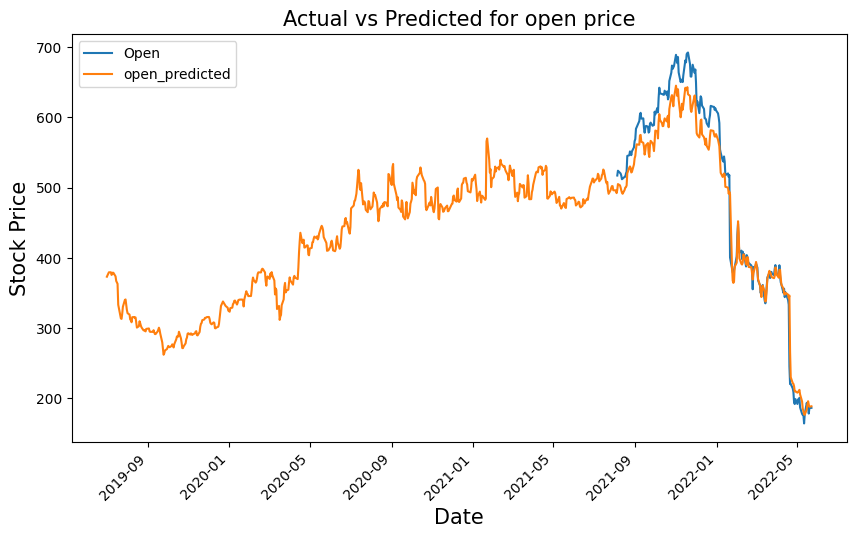

In [27]:
# plotting the actual open and predicted open prices on date index
df1[['Open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

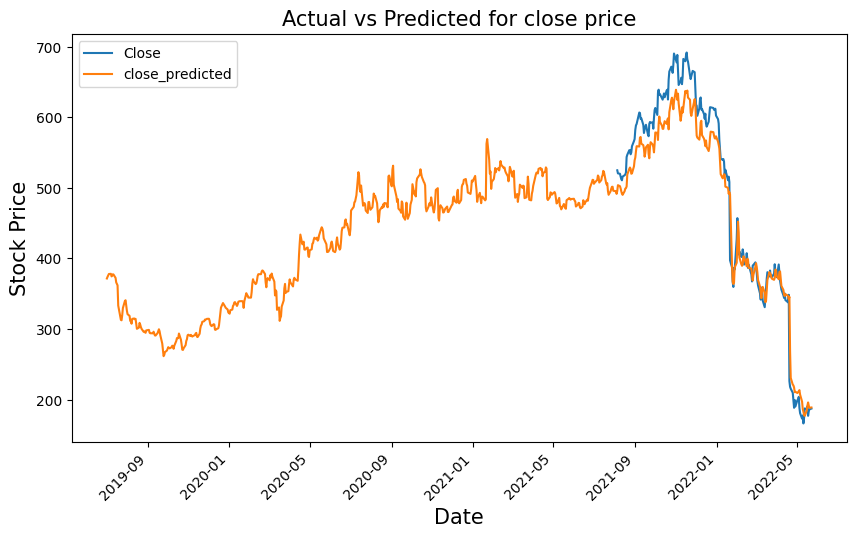

In [28]:
# plotting the actual close and predicted close prices on date index 
df1[['Close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

# Predicting forthcoming prediction

In [29]:
df1

,Open,Close,open_predicted,close_predicted
Date,,,,
2019-07-02,NaN,NaN,372.996429,371.668152
2019-07-03,NaN,NaN,375.191010,374.029755
2019-07-05,NaN,NaN,379.235565,378.034821
2019-07-08,NaN,NaN,379.324097,378.274658
2019-07-09,NaN,NaN,375.551239,374.654297
...,...,...,...,...
2022-05-17,189.169998,190.559998,191.235626,191.635422
2022-05-18,186.720001,177.190002,195.625641,196.123871
2022-05-19,178.050003,183.479996,190.799576,191.646149


In [30]:
# Creating a dataframe and adding 10 days to existing index 

df2 = pd.concat([df1,pd.DataFrame(columns=df1.columns,
                                        index=pd.date_range(start=df1.index[-1], periods=11, freq='D'))],axis=0)
df2['2022-02-03':'2022-02-21']

,Open,Close,open_predicted,close_predicted
2022-02-03,421.440002,405.600006,435.039948,436.916534
2022-02-04,407.309998,410.170013,399.449707,401.607697
2022-02-07,410.170013,402.100006,391.399200,391.684357
2022-02-08,398.179993,403.529999,390.347229,389.643433
2022-02-09,408.649994,412.890015,392.965424,391.702789
2022-02-10,402.100006,406.269989,404.796692,403.090637
2022-02-11,405.329987,391.309998,403.373627,402.219971
2022-02-14,387.589996,396.570007,392.478363,391.876404
2022-02-15,403.790009,407.459991,389.769165,388.910980
2022-02-16,401.529999,398.079987,401.033478,399.708252


In [31]:
# creating a DataFrame and filling values of open and close column
forthcoming_prediction = pd.DataFrame(columns=['open','close'],index=df1.index)
forthcoming_prediction.index=pd.to_datetime(forthcoming_prediction.index)

In [32]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  forthcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 32ms/step


In [35]:
# inversing Normalization/scaling
forthcoming_prediction[['open','close']] = MMS.inverse_transform(forthcoming_prediction[['open','close']])

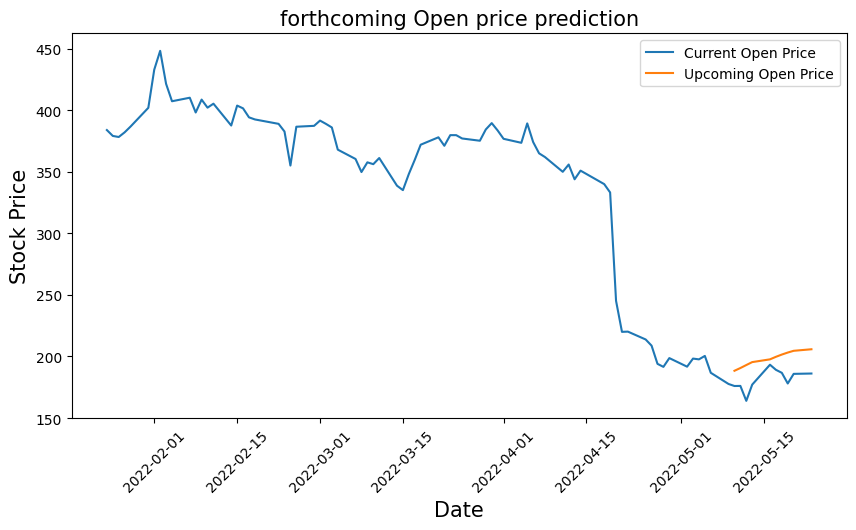

In [36]:
# plotting forthcoming Open price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df1.loc['2022-01-24':,'Open'],label='Current Open Price')
ax.plot(forthcoming_prediction.loc['2022-01-24':,'open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('forthcoming Open price prediction',size=15)
ax.legend()
fig.show()

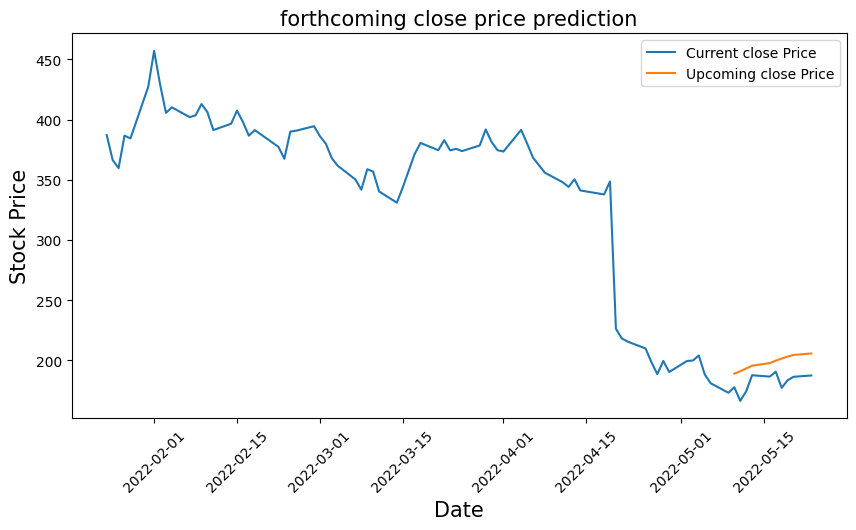

In [37]:
# plotting Upcoming Open price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df1.loc['2022-01-24':,'Close'],label='Current close Price')
ax.plot(forthcoming_prediction.loc['2022-01-24':,'close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('forthcoming close price prediction',size=15)
ax.legend()
fig.show()